In [1]:
from pydataset import data
import pandas as pd
import numpy as np
from env import host, user, password
%matplotlib inline
import matplotlib.pyplot as plt

### 1. Load the mpg dataset. Read the documentation for it, and use the data to answer these questions:

In [2]:
mpg = data("mpg")

In [3]:
data("mpg", show_doc=True)

mpg

PyDataset Documentation (adopted from R Documentation. The displayed examples are in R)

## Fuel economy data from 1999 and 2008 for 38 popular models of car

### Description

This dataset contains a subset of the fuel economy data that the EPA makes
available on http://fueleconomy.gov. It contains only models which had a new
release every year between 1999 and 2008 - this was used as a proxy for the
popularity of the car.

### Usage

    data(mpg)

### Format

A data frame with 234 rows and 11 variables

### Details

  * manufacturer. 

  * model. 

  * displ. engine displacement, in litres 

  * year. 

  * cyl. number of cylinders 

  * trans. type of transmission 

  * drv. f = front-wheel drive, r = rear wheel drive, 4 = 4wd 

  * cty. city miles per gallon 

  * hwy. highway miles per gallon 

  * fl. 

  * class. 




In [4]:
mpg

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
...,...,...,...,...,...,...,...,...,...,...,...
230,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize
231,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize
232,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize
233,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize


In [5]:
# On average, which manufacturer has the best miles per gallon? - cty
mpg.groupby("manufacturer").mean().sort_values("cty", ascending=False).head()

,displ,year,cyl,cty,hwy
manufacturer,,,,,
honda,1.711111,2003.000000,4.000000,24.444444,32.555556
volkswagen,2.255556,2002.666667,4.592593,20.925926,29.222222
subaru,2.457143,2004.142857,4.000000,19.285714,25.571429
hyundai,2.428571,2004.142857,4.857143,18.642857,26.857143
toyota,2.952941,2002.705882,5.117647,18.529412,24.911765


In [6]:
# On average, which manufacturer has the best miles per gallon? - hwy
mpg.groupby("manufacturer").mean().sort_values("hwy", ascending=False).head()

,displ,year,cyl,cty,hwy
manufacturer,,,,,
honda,1.711111,2003.000000,4.000000,24.444444,32.555556
volkswagen,2.255556,2002.666667,4.592593,20.925926,29.222222
hyundai,2.428571,2004.142857,4.857143,18.642857,26.857143
audi,2.544444,2003.500000,5.222222,17.611111,26.444444
pontiac,3.960000,2002.600000,6.400000,17.000000,26.400000


In [7]:
# How many different manufacturers are there?
len(mpg["manufacturer"].unique())

15

In [8]:
# How many different models are there?
len(mpg["model"].unique())

38

In [9]:
# Do automatic or manual cars have better miles per gallon?
mpg["general_trans"] = mpg["trans"].str[:4]
mpg.groupby("general_trans").mean()

,displ,year,cyl,cty,hwy
general_trans,,,,,
auto,3.719745,2003.757962,6.203822,15.968153,22.292994
manu,2.966234,2002.974026,5.246753,18.675325,25.779221


In [10]:
mpg.groupby("general_trans").median()

,displ,year,cyl,cty,hwy
general_trans,,,,,
auto,3.8,2008,6,16,22
manu,2.5,1999,4,18,26


### 2. Joining and Merging

In [11]:
# Copy the users and roles dataframes from the examples above.
users = pd.DataFrame({
    'id': [1, 2, 3, 4, 5, 6],
    'name': ['bob', 'joe', 'sally', 'adam', 'jane', 'mike'],
    'role_id': [1, 2, 3, 3, np.nan, np.nan]
})

users

,id,name,role_id
0,1,bob,1.0
1,2,joe,2.0
2,3,sally,3.0
3,4,adam,3.0
4,5,jane,NaN
5,6,mike,NaN


In [12]:
users["role_id"]

0    1.0
1    2.0
2    3.0
3    3.0
4    NaN
5    NaN
Name: role_id, dtype: float64

In [13]:
roles = pd.DataFrame({
    'id': [1, 2, 3, 4],
    'name': ['admin', 'author', 'reviewer', 'commenter']
})

roles

,id,name
0,1,admin
1,2,author
2,3,reviewer
3,4,commenter


In [14]:
# What do you think a right join would look like?
pd.merge(users, roles, left_on="role_id", right_on="id", how="right")

,id_x,name_x,role_id,id_y,name_y
0,1.0,bob,1.0,1,admin
1,2.0,joe,2.0,2,author
2,3.0,sally,3.0,3,reviewer
3,4.0,adam,3.0,3,reviewer
4,NaN,NaN,NaN,4,commenter


In [15]:
pd.merge?

In [16]:
# An outer join?
pd.merge(users, roles, left_on="role_id", right_on="id", how="outer")

,id_x,name_x,role_id,id_y,name_y
0,1.0,bob,1.0,1.0,admin
1,2.0,joe,2.0,2.0,author
2,3.0,sally,3.0,3.0,reviewer
3,4.0,adam,3.0,3.0,reviewer
4,5.0,jane,NaN,NaN,NaN
5,6.0,mike,NaN,NaN,NaN
6,NaN,NaN,NaN,4.0,commenter


###### What happens if you drop the foreign keys from the dataframes and try to merge them?
This won't work since there's no way to link the data together between the tables

In [17]:
# What happens if you drop the foreign keys from the dataframes and try to merge them?
users.drop(columns="role_id", inplace=True)
users

,id,name
0,1,bob
1,2,joe
2,3,sally
3,4,adam
4,5,jane
5,6,mike


In [18]:
pd.merge(users, roles, left_on="id", right_on="id", how="outer")

,id,name_x,name_y
0,1,bob,admin
1,2,joe,author
2,3,sally,reviewer
3,4,adam,commenter
4,5,jane,NaN
5,6,mike,NaN


###### The above output is not useful since the merge is made on primary keys native to each DataFrame (e.g. adam is not a commenter despite what is detailed above - see initial user DataFrame).

### 3. Getting data from SQL databases

In [19]:
# a. Create a function named get_db_url.
# It should accept a username, hostname, password, and database name and return a url
# formatted like in the examples in this lesson.
def get_db_url(username, hostname, password, database):
    return f"mysql+pymysql://{username}:{password}@{hostname}/{database}"

employees_url = get_db_url(user, host, password, "employees")

In [20]:
# b. Use your function to obtain a connection to the employees database.
employees = pd.read_sql("SELECT * FROM employees", employees_url)
employees

,emp_no,birth_date,first_name,last_name,gender,hire_date
0,10001,1953-09-02,Georgi,Facello,M,1986-06-26
1,10002,1964-06-02,Bezalel,Simmel,F,1985-11-21
2,10003,1959-12-03,Parto,Bamford,M,1986-08-28
3,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01
4,10005,1955-01-21,Kyoichi,Maliniak,M,1989-09-12
...,...,...,...,...,...,...
300019,499995,1958-09-24,Dekang,Lichtner,F,1993-01-12
300020,499996,1953-03-07,Zito,Baaz,M,1990-09-27
300021,499997,1961-08-03,Berhard,Lenart,M,1986-04-21
300022,499998,1956-09-05,Patricia,Breugel,M,1993-10-13


In [21]:
# c. Once you have successfully run a query:
## Intentionally make a typo in the database url. What kind of error message do you see?
pd.read_sql("SELECT * FROM employees", get_db_url(user, host, password, "employee"))

OperationalError: (pymysql.err.OperationalError) (1044, "Access denied for user 'curie_952'@'%' to database 'employee'")
(Background on this error at: http://sqlalche.me/e/e3q8)

In [23]:
## Intentionally make an error in your SQL query. What does the error message look like?
pd.read_sql("SELECT * FROM emplyees", employees_url)

ProgrammingError: (pymysql.err.ProgrammingError) (1146, "Table 'employees.emplyees' doesn't exist")
[SQL: SELECT * FROM emplyees]
(Background on this error at: http://sqlalche.me/e/f405)

In [24]:
# d. Read the employees and titles tables into two separate dataframes
employees

,emp_no,birth_date,first_name,last_name,gender,hire_date
0,10001,1953-09-02,Georgi,Facello,M,1986-06-26
1,10002,1964-06-02,Bezalel,Simmel,F,1985-11-21
2,10003,1959-12-03,Parto,Bamford,M,1986-08-28
3,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01
4,10005,1955-01-21,Kyoichi,Maliniak,M,1989-09-12
...,...,...,...,...,...,...
300019,499995,1958-09-24,Dekang,Lichtner,F,1993-01-12
300020,499996,1953-03-07,Zito,Baaz,M,1990-09-27
300021,499997,1961-08-03,Berhard,Lenart,M,1986-04-21
300022,499998,1956-09-05,Patricia,Breugel,M,1993-10-13


In [29]:
titles = pd.read_sql("SELECT * FROM titles", employees_url)
titles

,emp_no,title,from_date,to_date
0,10001,Senior Engineer,1986-06-26,9999-01-01
1,10002,Staff,1996-08-03,9999-01-01
2,10003,Senior Engineer,1995-12-03,9999-01-01
3,10004,Engineer,1986-12-01,1995-12-01
4,10004,Senior Engineer,1995-12-01,9999-01-01
...,...,...,...,...
443303,499997,Engineer,1987-08-30,1992-08-29
443304,499997,Senior Engineer,1992-08-29,9999-01-01
443305,499998,Senior Staff,1998-12-27,9999-01-01
443306,499998,Staff,1993-12-27,1998-12-27


In [30]:
current_employees = pd.read_sql("SELECT * FROM titles WHERE to_date='9999-01-01'", employees_url)
current_employees

,emp_no,title,from_date,to_date
0,10001,Senior Engineer,1986-06-26,9999-01-01
1,10002,Staff,1996-08-03,9999-01-01
2,10003,Senior Engineer,1995-12-03,9999-01-01
3,10004,Senior Engineer,1995-12-01,9999-01-01
4,10005,Senior Staff,1996-09-12,9999-01-01
...,...,...,...,...
240119,499995,Engineer,1997-06-02,9999-01-01
240120,499996,Senior Engineer,2002-05-13,9999-01-01
240121,499997,Senior Engineer,1992-08-29,9999-01-01
240122,499998,Senior Staff,1998-12-27,9999-01-01


In [31]:
plt.bar?

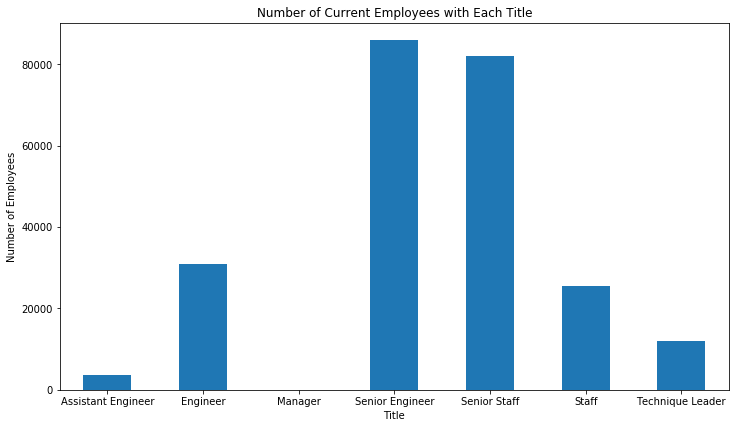

In [32]:
# e. Visualize the number of employees with each title.
y = current_employees.groupby("title").emp_no.count()

plt.figure(figsize=(12,6.75))
y.plot.bar()
plt.xticks(rotation=0)
plt.xlabel("Title")
plt.ylabel("Number of Employees")
plt.title("Number of Current Employees with Each Title")
plt.show()

In [33]:
# f. Join the employees and titles dataframes together.
emps_titles_df = pd.merge(employees, titles, left_on="emp_no", right_on="emp_no", how="outer")
emps_titles_df

,emp_no,birth_date,first_name,last_name,gender,hire_date,title,from_date,to_date
0,10001,1953-09-02,Georgi,Facello,M,1986-06-26,Senior Engineer,1986-06-26,9999-01-01
1,10002,1964-06-02,Bezalel,Simmel,F,1985-11-21,Staff,1996-08-03,9999-01-01
2,10003,1959-12-03,Parto,Bamford,M,1986-08-28,Senior Engineer,1995-12-03,9999-01-01
3,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01,Engineer,1986-12-01,1995-12-01
4,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01,Senior Engineer,1995-12-01,9999-01-01
...,...,...,...,...,...,...,...,...,...
443303,499997,1961-08-03,Berhard,Lenart,M,1986-04-21,Engineer,1987-08-30,1992-08-29
443304,499997,1961-08-03,Berhard,Lenart,M,1986-04-21,Senior Engineer,1992-08-29,9999-01-01
443305,499998,1956-09-05,Patricia,Breugel,M,1993-10-13,Senior Staff,1998-12-27,9999-01-01
443306,499998,1956-09-05,Patricia,Breugel,M,1993-10-13,Staff,1993-12-27,1998-12-27


In [36]:
terminated_employees = pd.read_sql("""SELECT *
FROM titles
WHERE to_date < CURDATE()""", employees_url)
terminated_employees

,emp_no,title,from_date,to_date
0,10004,Engineer,1986-12-01,1995-12-01
1,10005,Staff,1989-09-12,1996-09-12
2,10007,Staff,1989-02-10,1996-02-11
3,10008,Assistant Engineer,1998-03-11,2000-07-31
4,10009,Assistant Engineer,1985-02-18,1990-02-18
...,...,...,...,...
203179,499992,Staff,1987-05-10,1992-05-09
203180,499994,Engineer,1993-02-22,1993-10-27
203181,499996,Engineer,1996-05-13,2002-05-13
203182,499997,Engineer,1987-08-30,1992-08-29


In [37]:
years_in_position = terminated_employees["to_date"] - terminated_employees["from_date"]
years_in_position

0        3287 days
1        2557 days
2        2557 days
3         873 days
4        1826 days
            ...   
203179   1826 days
203180    247 days
203181   2191 days
203182   1826 days
203183   1826 days
Length: 203184, dtype: timedelta64[ns]

In [38]:
years_between_title_change = round(years_in_position.dt.days / 365.25, 2)
years_between_title_change

0         9.00
1         7.00
2         7.00
3         2.39
4         5.00
          ... 
203179    5.00
203180    0.68
203181    6.00
203182    5.00
203183    5.00
Length: 203184, dtype: float64

In [40]:
terminated_employees["years_between_title_change"] = years_between_title_change
terminated_employees

,emp_no,title,from_date,to_date,years_between_title_change
0,10004,Engineer,1986-12-01,1995-12-01,9.00
1,10005,Staff,1989-09-12,1996-09-12,7.00
2,10007,Staff,1989-02-10,1996-02-11,7.00
3,10008,Assistant Engineer,1998-03-11,2000-07-31,2.39
4,10009,Assistant Engineer,1985-02-18,1990-02-18,5.00
...,...,...,...,...,...
203179,499992,Staff,1987-05-10,1992-05-09,5.00
203180,499994,Engineer,1993-02-22,1993-10-27,0.68
203181,499996,Engineer,1996-05-13,2002-05-13,6.00
203182,499997,Engineer,1987-08-30,1992-08-29,5.00


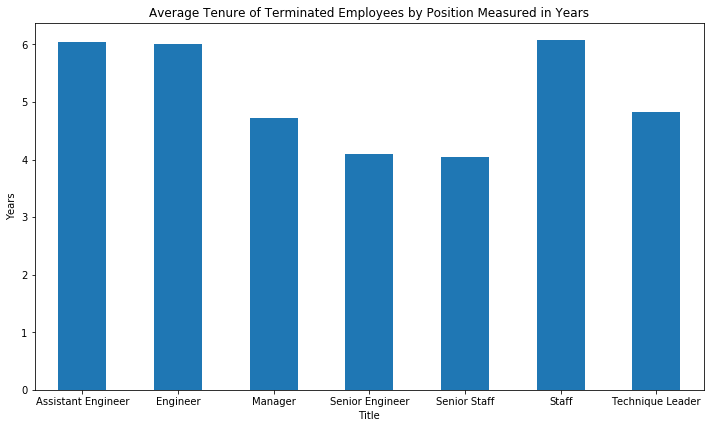

In [41]:
# g.Visualize how frequently employees change titles.
y = terminated_employees.groupby("title").years_between_title_change.mean()

plt.figure(figsize=(12,6.75))
y.plot.bar()
plt.xticks(rotation=0)
plt.xlabel("Title")
plt.ylabel("Years")
plt.title("Average Tenure of Terminated Employees by Position Measured in Years")
plt.show()

In [42]:
terminated_employees["years_between_title_change"].mean()

5.80074282423814

In [43]:
terminated_employees.pivot_table(values="years_between_title_change", index="title", aggfunc="mean")

,years_between_title_change
title,
Assistant Engineer,6.040607
Engineer,6.003337
Manager,4.722000
Senior Engineer,4.101542
Senior Staff,4.053095
Staff,6.072168
Technique Leader,4.834427


In [44]:
# h. For each title, find the hire date of the employee that was hired most recently with that title.
emps_titles_df.groupby("title").hire_date.max()

title
Assistant Engineer    1999-12-24
Engineer              2000-01-28
Manager               1992-02-05
Senior Engineer       2000-01-01
Senior Staff          2000-01-13
Staff                 2000-01-12
Technique Leader      1999-12-31
Name: hire_date, dtype: object

In [45]:
# i. Write the code necessary to create a cross tabulation of the number of titles by department.
# (Hint: this will involve a combination of SQL and python/pandas code)
dept_title = pd.read_sql("""SELECT t.title, d.dept_name 
FROM titles AS t 
JOIN dept_emp AS de ON t.emp_no = de.emp_no 
JOIN departments as d ON de.dept_no = d.dept_no 
WHERE de.to_date > CURDATE()""", employees_url)
dept_title


,title,dept_name
0,Senior Staff,Customer Service
1,Staff,Customer Service
2,Senior Staff,Customer Service
3,Staff,Customer Service
4,Senior Staff,Customer Service
...,...,...
371238,Senior Staff,Sales
371239,Staff,Sales
371240,Senior Staff,Sales
371241,Staff,Sales


In [46]:
pd.crosstab(dept_title.title, dept_title.dept_name)

dept_name,Customer Service,Development,Finance,Human Resources,Marketing,Production,Quality Management,Research,Sales
title,,,,,,,,,
Assistant Engineer,240,5551,0,0,0,4670,1280,316,0
Engineer,1927,42111,0,0,0,36308,10174,2416,0
Manager,4,2,2,2,2,4,4,2,2
Senior Engineer,1790,38816,0,0,0,33627,9459,2250,0
Senior Staff,11271,1085,9546,9825,11291,1123,0,9093,28797
Staff,11836,1123,9995,10407,11885,1185,0,9646,30117
Technique Leader,241,5478,0,0,0,4724,1295,321,0


### 4. Use your get_db_url function to help you explore the data from the chipotle database. Use the data to answer the following questions:

In [47]:
chipotle_url = get_db_url(user, host, password, "chipotle")

In [50]:
chipotle = pd.read_sql("SELECT * FROM orders", chipotle_url)
chipotle.head(10)

,id,order_id,quantity,item_name,choice_description,item_price
0,1,1,1,Chips and Fresh Tomato Salsa,nan,$2.39
1,2,1,1,Izze,[Clementine],$3.39
2,3,1,1,Nantucket Nectar,[Apple],$3.39
3,4,1,1,Chips and Tomatillo-Green Chili Salsa,nan,$2.39
4,5,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans, Rice, Cheese, Sour Cream]]",$16.98
5,6,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sour Cream, Guacamole, Lettuce]]",$10.98
6,7,3,1,Side of Chips,nan,$1.69
7,8,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables, Black Beans, Pinto Beans, Cheese, Sour...",$11.75
8,9,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Cheese, Sour Cream, Lettuce]]",$9.25
9,10,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto Beans, Cheese, Sour Cream, Lettuce]]",$9.25


In [49]:
# What is the total price for each order?
chipotle.groupby("order_id").item_price.sum()

order_id
1       $2.39 $3.39 $3.39 $2.39 
2                        $16.98 
3                  $10.98 $1.69 
4                  $11.75 $9.25 
5                   $9.25 $4.45 
                  ...           
1830              $11.75 $11.25 
1831          $9.25 $2.15 $1.50 
1832                $8.75 $4.45 
1833              $11.75 $11.75 
1834         $11.25 $8.75 $8.75 
Name: item_price, Length: 1834, dtype: object

In [62]:
chipotle["price_only_numbers"] = chipotle["item_price"].str.replace("$", "").str.replace(",", "").astype("float")
chipotle["price_only_numbers"]

0        2.39
1        3.39
2        3.39
3        2.39
4       16.98
        ...  
4617    11.75
4618    11.75
4619    11.25
4620     8.75
4621     8.75
Name: price_only_numbers, Length: 4622, dtype: float64

In [68]:
chipotle.assign(total_order_price=chipotle.groupby("order_id").price_only_numbers.transform("sum"))

,id,order_id,quantity,item_name,choice_description,item_price,price_only_numbers,total_order_price
0,1,1,1,Chips and Fresh Tomato Salsa,nan,$2.39,2.39,11.56
1,2,1,1,Izze,[Clementine],$3.39,3.39,11.56
2,3,1,1,Nantucket Nectar,[Apple],$3.39,3.39,11.56
3,4,1,1,Chips and Tomatillo-Green Chili Salsa,nan,$2.39,2.39,11.56
4,5,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans, Rice, Cheese, Sour Cream]]",$16.98,16.98,16.98
...,...,...,...,...,...,...,...,...
4617,4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour Cream, Cheese, Lettuce, Guacamole]]",$11.75,11.75,23.50
4618,4619,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese, Lettuce, Guacamole]]",$11.75,11.75,23.50
4619,4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto Beans, Guacamole, Lettuce]]",$11.25,11.25,28.75
4620,4621,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettuce]]",$8.75,8.75,28.75


In [87]:
chipotle.head(15)

,id,order_id,quantity,item_name,choice_description,item_price,price_only_numbers
0,1,1,1,Chips and Fresh Tomato Salsa,nan,$2.39,2.39
1,2,1,1,Izze,[Clementine],$3.39,3.39
2,3,1,1,Nantucket Nectar,[Apple],$3.39,3.39
3,4,1,1,Chips and Tomatillo-Green Chili Salsa,nan,$2.39,2.39
4,5,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans, Rice, Cheese, Sour Cream]]",$16.98,16.98
5,6,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sour Cream, Guacamole, Lettuce]]",$10.98,10.98
6,7,3,1,Side of Chips,nan,$1.69,1.69
7,8,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables, Black Beans, Pinto Beans, Cheese, Sour...",$11.75,11.75
8,9,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Cheese, Sour Cream, Lettuce]]",$9.25,9.25
9,10,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto Beans, Cheese, Sour Cream, Lettuce]]",$9.25,9.25


In [81]:
# What are the most popular 3 items?
chipotle.groupby("item_name").quantity.sum().nlargest(3)

item_name
Chicken Bowl           761
Chicken Burrito        591
Chips and Guacamole    506
Name: quantity, dtype: int64

In [84]:
# Which item has produced the most revenue?
chipotle.groupby("item_name").price_only_numbers.sum().nlargest(1)

item_name
Chicken Bowl    7342.73
Name: price_only_numbers, dtype: float64

In [88]:
# Calculate findings using item_price multipied by quantity